In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import yfinance as yf
import json
import numpy as np
import pandas as pd

In [3]:
ticker = yf.Ticker("MSFT")

[*********************100%***********************]  2 of 2 completed


<AxesSubplot: xlabel='Date'>

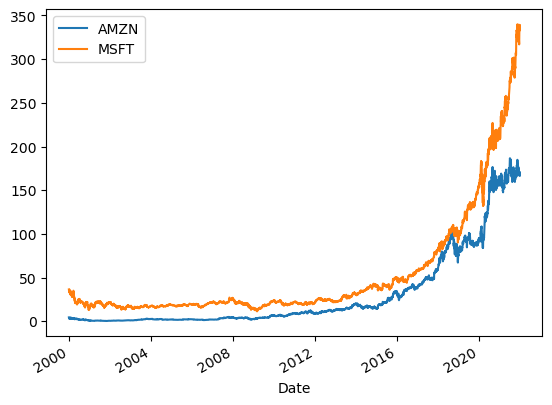

In [4]:
data = yf.download("MSFT AMZN", start="2000-01-01", end="2022-01-01")["Adj Close"]
data.plot()

<AxesSubplot: xlabel='Date'>

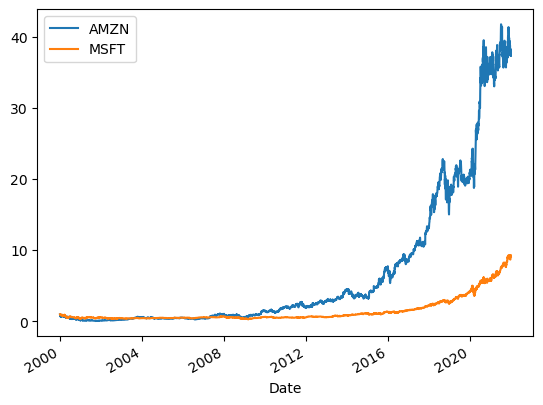

In [5]:
def to_relative(series: pd.Series) -> pd.Series:
    return series / series.iloc[0]


data.apply(to_relative).plot()

In [6]:
data

,AMZN,MSFT
Date,,
2000-01-03 00:00:00-05:00,4.468750,36.452644
2000-01-04 00:00:00-05:00,4.096875,35.221275
2000-01-05 00:00:00-05:00,3.487500,35.592644
2000-01-06 00:00:00-05:00,3.278125,34.400360
2000-01-07 00:00:00-05:00,3.478125,34.849907
...,...,...
2021-12-27 00:00:00-05:00,169.669495,339.270966
2021-12-28 00:00:00-05:00,170.660995,338.082092
2021-12-29 00:00:00-05:00,169.201004,338.775635


In [7]:
data.describe()

,AMZN,MSFT
count,5536.000000,5536.000000
mean,30.141437,52.882697
std,46.125569,64.665666
min,0.298500,11.404861
25%,2.136625,18.921103
50%,8.689250,22.487787
75%,36.406749,50.134824
max,186.570496,339.924835


In [10]:
def abs_start_end_change(series: pd.Series) -> float:
    return series.iloc[-1] - series.iloc[0]


def rel_start_end_change(series: pd.Series) -> float:
    return (abs_start_end_change(series) / series.iloc[0]) * 100


def max_fall(series: pd.Series) -> float:
    return np.min(
        [
            (np.min(series.iloc[i:] - np.max(series.iloc[:i])))
            / np.max(series.iloc[:i])
            for i in range(1, len(series))
        ]
    )


def max_rise(series: pd.Series) -> float:
    return np.max(
        [
            (np.max(series.iloc[i:] - np.min(series.iloc[:i])))
            / np.min(series.iloc[:i])
            for i in range(1, len(series))
        ]
    )

In [11]:
data.agg([max_fall, max_rise])

,max_fall,max_rise
AMZN,-0.93,624.03
MSFT,-0.69,28.81


In [17]:
pd.concat(
    (
        data.describe(),
        data.agg([abs_start_end_change, rel_start_end_change, max_fall, max_rise]),
    )
).round(2).transpose().sort_values(by="rel_start_end_change", ascending=False)

,count,mean,std,min,25%,50%,75%,max,abs_start_end_change,rel_start_end_change,max_fall,max_rise
AMZN,5536.0,30.14,46.13,0.3,2.14,8.69,36.41,186.57,162.25,3630.73,-0.93,624.03
MSFT,5536.0,52.88,64.67,11.4,18.92,22.49,50.13,339.92,296.75,814.06,-0.69,28.81


In [ ]:
data.agg(
    ["count", "min", "mean", "max", abs_start_end_change, rel_start_end_change]
).round(2).transpose()

In [ ]:
(339.92 - 11.40) / 11.40

In [ ]:
type(np.mean([1, 2, 3]))

In [ ]:
data = yf.download("BTC-USD", start="2008-01-01", end="2022-01-01")["Adj Close"]
data.plot()
data = yf.download("ETH-USD", start="2008-01-01", end="2022-01-01")["Adj Close"]
data.plot()

In [ ]:
yf.download("BTC-USD", start="2008-01-01", end="2022-01-01")

In [ ]:
yf.download("ETH-USD", start="2008-01-01", end="2022-01-01")

In [ ]:
info = yf.Ticker("0P00011HBM.F").info

In [ ]:
info.keys()

In [ ]:
info["holdings"]

In [ ]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get all stock info (slow)
msft.info
# fast access to subset of stock info (opportunistic)
msft.fast_info

# get historical market data
hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
msft.history_metadata

# show actions (dividends, splits, capital gains)
msft.actions
msft.dividends
msft.splits
msft.capital_gains  # only for mutual funds & etfs

# show share count
# - yearly summary:
msft.shares
# - accurate time-series count:
msft.get_shares_full(start="2022-01-01", end=None)

# show financials:
# - income statement
msft.income_stmt
msft.quarterly_income_stmt
# - balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet
# - cash flow statement
msft.cashflow
msft.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

# show holders
msft.major_holders
msft.institutional_holders
msft.mutualfund_holders

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations
msft.recommendations_summary
# show analysts other work
msft.analyst_price_target
msft.revenue_forecasts
msft.earnings_forecasts
msft.earnings_trend

# show next event (earnings, etc)
msft.calendar

# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default.
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# show news
msft.news

# get option chain for specific expiration
opt = msft.option_chain("YYYY-MM-DD")
# data available via: opt.calls, opt.puts